In [1]:
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt
import pandas as pd
import os

In [96]:
from matplotlib import font_manager

fontP = font_manager.FontProperties()
fontP.set_family('SimHei')
fontP.set_size(14)

In [2]:
pro = ts.pro_api(os.environ['TUSHARE_API_TOKEN'])

In [3]:
start = '20200801'                 # 回测起始时间
end = '20200831'                   # 回测结束时间

In [4]:
hs300_data = pro.index_daily(ts_code='000300.SH', start_date=start, end_date=end).sort_index(ascending=False) # 沪深300
cyb_data = pro.index_daily(ts_code='399006.SZ', start_date=start, end_date=end).sort_index(ascending=False) # 创业板

In [5]:
hsi_data = pro.index_global(ts_code='HSI', start_date=start, end_date=end).sort_index(ascending=False) # 恒生
spx_data = pro.index_global(ts_code='SPX', start_date=start, end_date=end).sort_index(ascending=False) # 标普500
ixic_data = pro.index_global(ts_code='IXIC', start_date=start, end_date=end).sort_index(ascending=False) # 纳斯达克

In [105]:
hs300_close_price = np.array(hs300_data['close'])
cyb_close_price = np.array(cyb_data['close'])
hsi_close_price = np.array(hsi_data['close'])
spx_close_price = np.array(spx_data['close'])
ixic_close_price = np.array(ixic_data['close'])
print(hs300_data)

      ts_code trade_date      close       open       high        low  \
20  000300.SH   20200803  4771.3108  4735.8985  4771.3694  4720.0250   
19  000300.SH   20200804  4775.8024  4778.4866  4807.0782  4747.7748   
18  000300.SH   20200805  4777.1089  4761.7637  4786.7031  4711.2723   
17  000300.SH   20200806  4762.7642  4779.2377  4791.8565  4691.1569   
16  000300.SH   20200807  4707.9262  4742.2939  4749.0217  4637.8427   
15  000300.SH   20200810  4724.8697  4681.7553  4757.6634  4646.2885   
14  000300.SH   20200811  4681.7837  4730.3748  4791.5337  4674.8642   
13  000300.SH   20200812  4647.6446  4668.8899  4681.6206  4566.2736   
12  000300.SH   20200813  4635.7126  4666.4901  4671.7689  4626.1033   
11  000300.SH   20200814  4704.6288  4627.6100  4708.0709  4617.6320   
10  000300.SH   20200817  4815.2261  4727.1204  4838.0864  4721.3589   
9   000300.SH   20200818  4812.7564  4816.5703  4825.3861  4788.8293   
8   000300.SH   20200819  4740.6784  4804.6655  4809.0499  4738.

In [113]:
def draw_index_change(ax, index_data, start_index, time, name):
    change = (index_data/start_index - 1) * 100
    ax.plot(time, change, label=name)
    for i,j in zip(time,change):
        if i == time[-1]:
            ax.annotate("{:10.2f}".format(j),xy=(i,j))

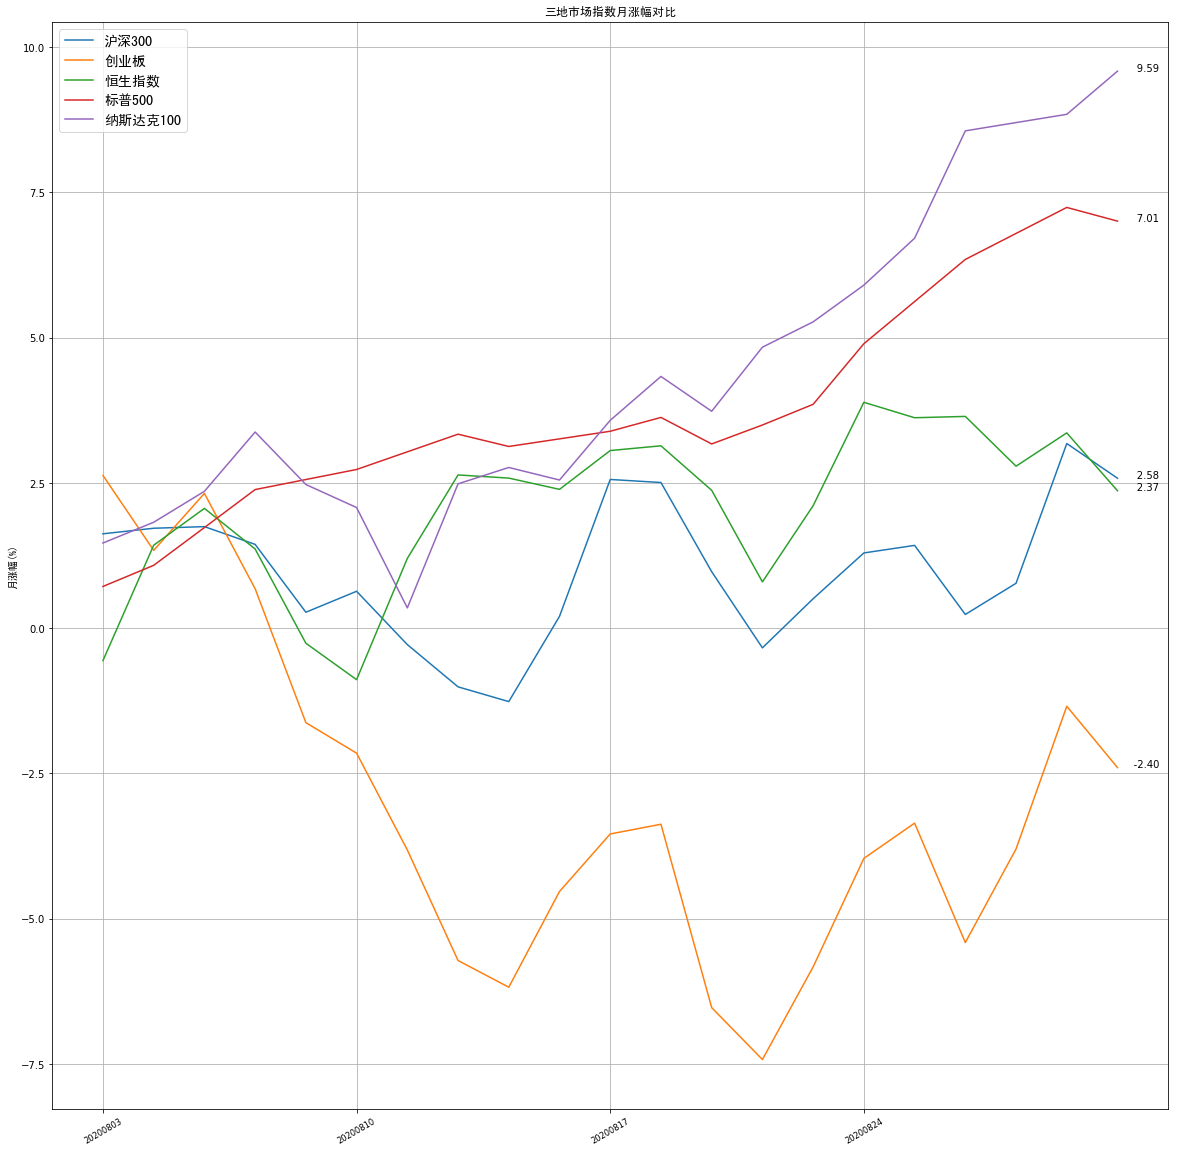

In [119]:
fig,ax=plt.subplots(figsize=(20,20))
draw_index_change(ax, np.array(hs300_data['close']), np.array(hs300_data['pre_close'])[0], np.array(hs300_data['trade_date']), '沪深300')
draw_index_change(ax, np.array(cyb_data['close']), np.array(cyb_data['pre_close'])[0], np.array(cyb_data['trade_date']), '创业板')
draw_index_change(ax, np.array(hsi_data['close']), np.array(hsi_data['pre_close'])[0], np.array(hsi_data['trade_date']), '恒生指数')
draw_index_change(ax, np.array(spx_data['close']), np.array(spx_data['pre_close'])[0], np.array(spx_data['trade_date']), '标普500')
draw_index_change(ax, np.array(ixic_data['close']), np.array(ixic_data['pre_close'])[0], np.array(ixic_data['trade_date']), '纳斯达克100')
ax.legend(loc='best', prop=fontP)
ax.grid(True)
ax.set_xticks([time[i] for i in range(0,len(time),5)])
ax.set_ylabel('月涨幅(%)', fontname='SimHei')
ax.set_title('三地市场指数月涨幅对比', fontname='SimHei')
plt.xticks(rotation=30,fontsize='small')
plt.show()